<a href="https://colab.research.google.com/github/IA1819/entregable2-lucabem/blob/master/VisualizacionDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import files
uploaded = files.upload()

Saving sample.csv to sample.csv
Saving test.csv to test.csv
Saving train.csv to train.csv


In [0]:
import io
df_sample = pd.read_csv(io.BytesIO(uploaded['sample.csv']))
df_train = pd.read_csv(io.BytesIO(uploaded['train.csv']))
df_test = pd.read_csv(io.BytesIO(uploaded['test.csv']))

# Visualizacion de nuestro dataset

Antes de comenzar vamos a cargar las librerías que serán necesarias. Con respecto a prácticas anteriores aparecen dos nuevas librerías matplotlib y seaborn. La versión de seaborn instalada en el entorno de Google Colaboratory no incluye algunos gráficos, por lo que lo primero que vamos a hacer es descargar la última versión de esta librería usando el siguiente comando.

In [5]:
!pip install seaborn==0.9.0

    100% |████████████████████████████████| 215kB 24.1MB/s 
  Found existing installation: seaborn 0.7.1
    Uninstalling seaborn-0.7.1:
      Successfully uninstalled seaborn-0.7.1


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
sns.set()
%config InlineBackend.figure_format = 'svg'

## 1. Visualizacion univariante

Este analisis se centra en un unico descriptor cada vez. Cuando analizamos un descriptor de manera independiente estamos interesados principalmente en conocer la distribución de sus valores e ignoramos el resto de descriptores del dataset.


A continuación se consideran distintos tipos de análisis de una variable.


1.   Cuantitativos
2.   Categóricos y binarios

Antes de empezar con los graficos, vamos a recordar qué descriptores tenia nuestro dataset.

In [8]:
df_train.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Prediction
0,40,Male,1.9,1.0,231,16,55,4.3,1.6,0.6,False
1,64,Male,0.9,0.3,310,61,58,7.0,3.4,0.9,True
2,40,Female,2.1,1.0,768,74,141,7.8,4.9,1.6,False
3,32,Male,25.0,13.7,560,41,88,7.9,2.5,2.5,False
4,48,Male,0.7,0.2,326,29,17,8.7,5.5,1.7,False


### 1.1 Cuantitativos

#### Histogramas y gráficos de densidad

La manera más sencilla de ver la distribución de una variable númerica consiste en mostrar su histograma, para ello podemos usar el método hist() de un DataFrame

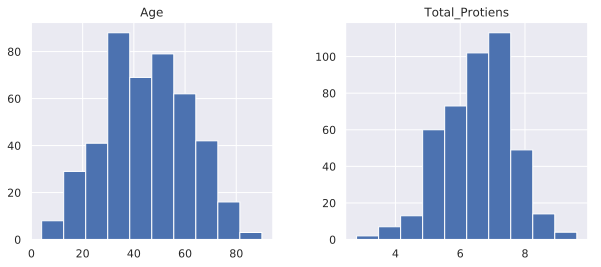

In [9]:
features = ['Age', 'Total_Protiens']
df_train[features].hist(figsize=(10, 4));

En el gráfico anterior, vemos que la variable *Total_Protiens*  sigue una distribucion normal, mientras que variable *Age* está desviada hacia la derecha.

Una forma más clara de ver que tipo de distribucion siguen las variables es a partir de los gráficos de densidad.

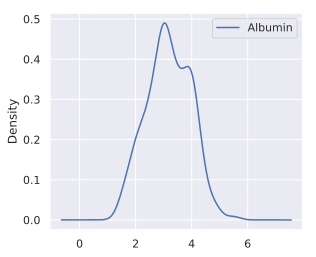

In [10]:
features = ['Albumin']
df_train[features].plot(kind='density', subplots=True, layout=(1, 2), 
                  sharex=False, figsize=(10, 4));

Podemos observar que la variable *albumin* tiene una distribucion normal bastante marcada.

También es posible mostrar la distribución de las observaciones con el método distplot() de la librería seaborn. Por ejemplo, vamos a ver la distribución para la variable Albumin

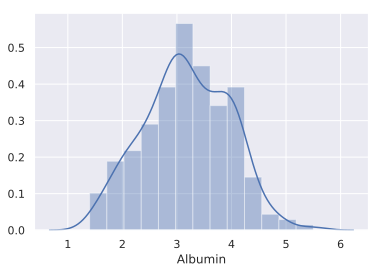

In [11]:
sns.distplot(df_train['Albumin']);

La altura de cada barra del histograma muestra la densidad en lugar del número de ejemplos en cada bin.

#### Gráficos de cajas

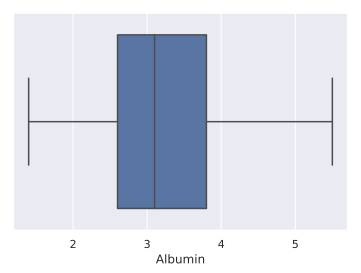

In [12]:
sns.boxplot(x='Albumin', data=df_train);

La albúmina es una porteína producida por el higado que ayuda a mantener el liquedo dentro del torrente sanguíneo sin que se filtre a los tejidos.

Los valores normales se situan en el rango 3.4 a 5.4 g/dL, por lo que podemos observar que entre el 50% y 75% de nuestros valores son normales, estando mas dispersos que los valores entre 25% y 50%.

Por otro lado, entre el 25% y el 50% tienen la albúmina baja, puediendo ser un signo de una enfermedad hépatica(como por ejemplo cirrosis).

####  Gráficos de violines

El último tipo de gráfico de distribución que vamos a ver son los gráficos de violines.

En la figura de abajo podemos ver un gráfico de violines. En la parte izquierda vemos el gráfico de cajas, mientras que en la derecha vemos el gráfico de violínes.

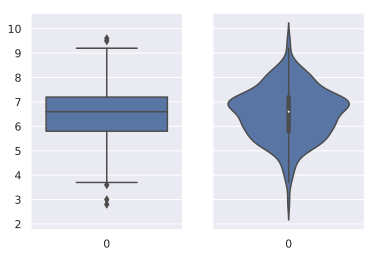

In [13]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
sns.boxplot(data=df_train['Total_Protiens'], ax=axes[0]);
sns.violinplot(data=df_train['Total_Protiens'], ax=axes[1]);

El grafico de violines respecto a la variable Total_Proteins nos hace ver que la distribucion que sigue esta variable es de tipo normal, mientras que el de cajas se centra en aspectos mas estadisticos (quartiles)

Para el analisis de proteina total, los valores normales se situan entre 6.4 a 8.3 gramos por decilitro. Con el grafico de violines vemos que la mayor parte de nuestro dataset se encuentra entre estos valores, estando entre el 25% y 75% entre dichos valores.

Gracias al de cajas, vemos que hay varios valores atipicos tanto por encima como por debajo. Referenciando a nuestro objetivo, estos datos pueden tener problemas de higado.

### 1.2 Categoricos y binarios

  Los descriptores categ´ricos toman un numero fijo de valores. A cada uno de estos valores se les conoce como categoría. Los descriptores binarios se pueden estudiar como un descriptor categórico con dos clases/categorías: verdadero o falso.

Vamos a recuperar la informacion sobre los datos de nuestro dataset, para ver cuales son categoricos/binarios.

In [14]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 11 columns):
Age                           437 non-null int64
Gender                        437 non-null object
Total_Bilirubin               437 non-null float64
Direct_Bilirubin              437 non-null float64
Alkaline_Phosphotase          437 non-null int64
Alamine_Aminotransferase      437 non-null int64
Aspartate_Aminotransferase    437 non-null int64
Total_Protiens                437 non-null float64
Albumin                       437 non-null float64
Albumin_and_Globulin_Ratio    437 non-null float64
Prediction                    437 non-null bool
dtypes: bool(1), float64(5), int64(4), object(1)
memory usage: 34.6+ KB


En nuestro caso, tenemos Gender y Prediction.

#### Tabla de Frecuencias


La tabla de frecuencias es una ordenación en forma de tabla de tabla de los datos estadísticos, asignando a cada dato su frencuencia correspondiente.


In [17]:
df_train['Gender'].value_counts()

Male      327
Female    110
Name: Gender, dtype: int64

Esto nos muestra que los hombres son mas propensos a realizar chequeos médicos para ver problemas en el higado frente a las mujeres. 

In [18]:
df_train['Prediction'].value_counts()

False    310
True     127
Name: Prediction, dtype: int64

En nuestro dataset por cad 3 resultados negativos tenemos 1 resultado positivo.

#### Gráfico de barras

Vamos a mostrar la distribución para dos descriptores categóricos.

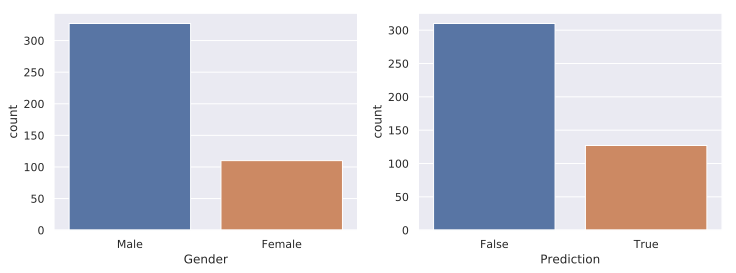

In [20]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.countplot(x='Gender', data=df_train, ax=axes[0]);
sns.countplot(x='Prediction', data=df_train, ax=axes[1]);

Vemos el desequlibrio existente en el descriptor *Gender*. Es probable que **EXPLICACION**

## 2. Visualización multivariante

Los gráficos multivariantes permiten mostrar relaciones entre dos o más descriptores en una única figura. Como en el caso de los gráficos univariantes el tipo específico de visualización dependerá del tipo de descriptor con el que estemos trabajando. 

### 2.1 Cuantitativo-Cualitativo

#### Matriz de correlación

Vamos a ver la correlación entre valores númericos de nuestro dataset. Esta información es importante ya que hay algoritmos de aprendizaje automático que no trabajan bien con variables altamente correladas. 

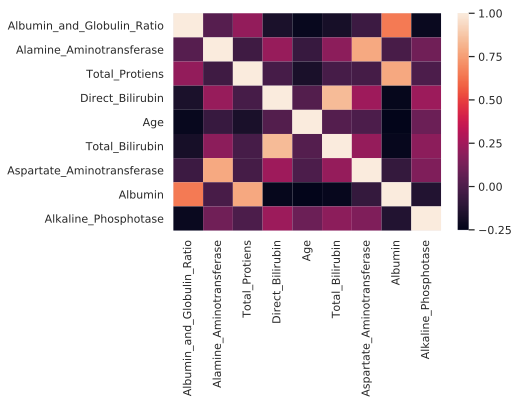

In [21]:
numerical = list(set(df_train.columns) - 
                 set(['Prediction']))

corr_matrix = df_train[numerical].corr()
sns.heatmap(corr_matrix);

En el anterior gráfico podemos ver las distintas correlacciones entre variables:


1.   La *Bilirrubina Directa* depende de la *Bilirrubina Total*
2.   La *Albumina* (es una proteina) depende de *Proteína total*
1.   El *Ratio de Albumina y Globulina* depende como es logico de la *Albumina*

Por ello vamos a quitar algun descriptor como es el caso del *Ratio de Albumina y Globulina*. También podriamos quitar la *Proteina Total* o la *Albumina*, ya que al estar altamente correlaccionadas quiere decir que ambas explican lo mismo. Podríamos aplicar lo mismo entre *Bilirrubina Directa* y la *Bilirrubina Total*




In [0]:
numerical = list(set(numerical) - 
                 set(['Albumin_and_Globulin_Ratio']))

#### Diagrama de dispersión

Los diagramas de dispersión muestran los valores de dos descriptores numéricos en las coordenadas Cartesianas de un espacio 2D. También es posible mostrar diagramas de dispersión en 3D. 

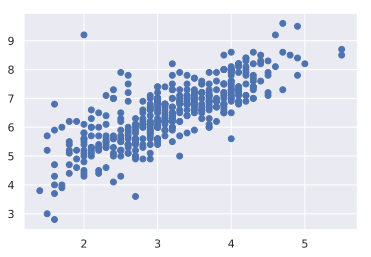

In [23]:
plt.scatter(df_train['Albumin'], df_train['Total_Protiens']);

Como hemos dicho antes, ambos descriptores estan altamente correlaccionados, por ello vemos una relaccion directa entre ambas.

En cambio si mostramos dos variables no correlaccionadas, nos queda el siguiente gráfico.

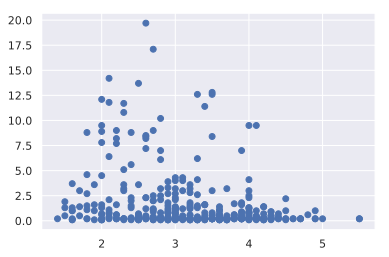

In [25]:
plt.scatter(df_train['Albumin'], df_train['Direct_Bilirubin']);

También es posible mostrar los gráficos de dispersión utilizando la librería seaborn:

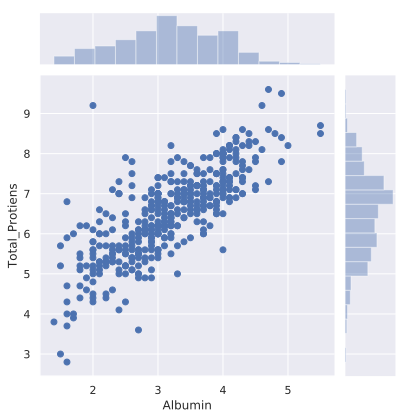

In [27]:
sns.jointplot(x='Albumin', y='Total_Protiens', 
              data=df_train, kind='scatter');

El antetiror grafico muestra unos descriptores correlaccionadas, ahora mostramos dos descriptores sin correlaccion.

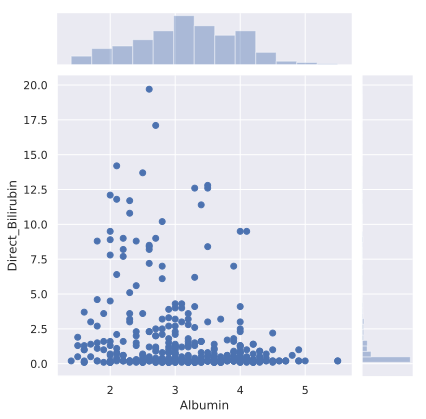

In [28]:
sns.jointplot(x='Albumin', y='Direct_Bilirubin', 
              data=df_train, kind='scatter');

#### Matriz de diagramas de dispersión

En algunos caos, resulta útil mostrar una matriz de diagramas de dispersión como se muestra a continuación. La diagonal de dicha matriz contiene las distribuciones de los correspondientes descriptores, miesntras que los diagramas de dispersión para cada par de descriptores rellenan el resto de la matriz. 

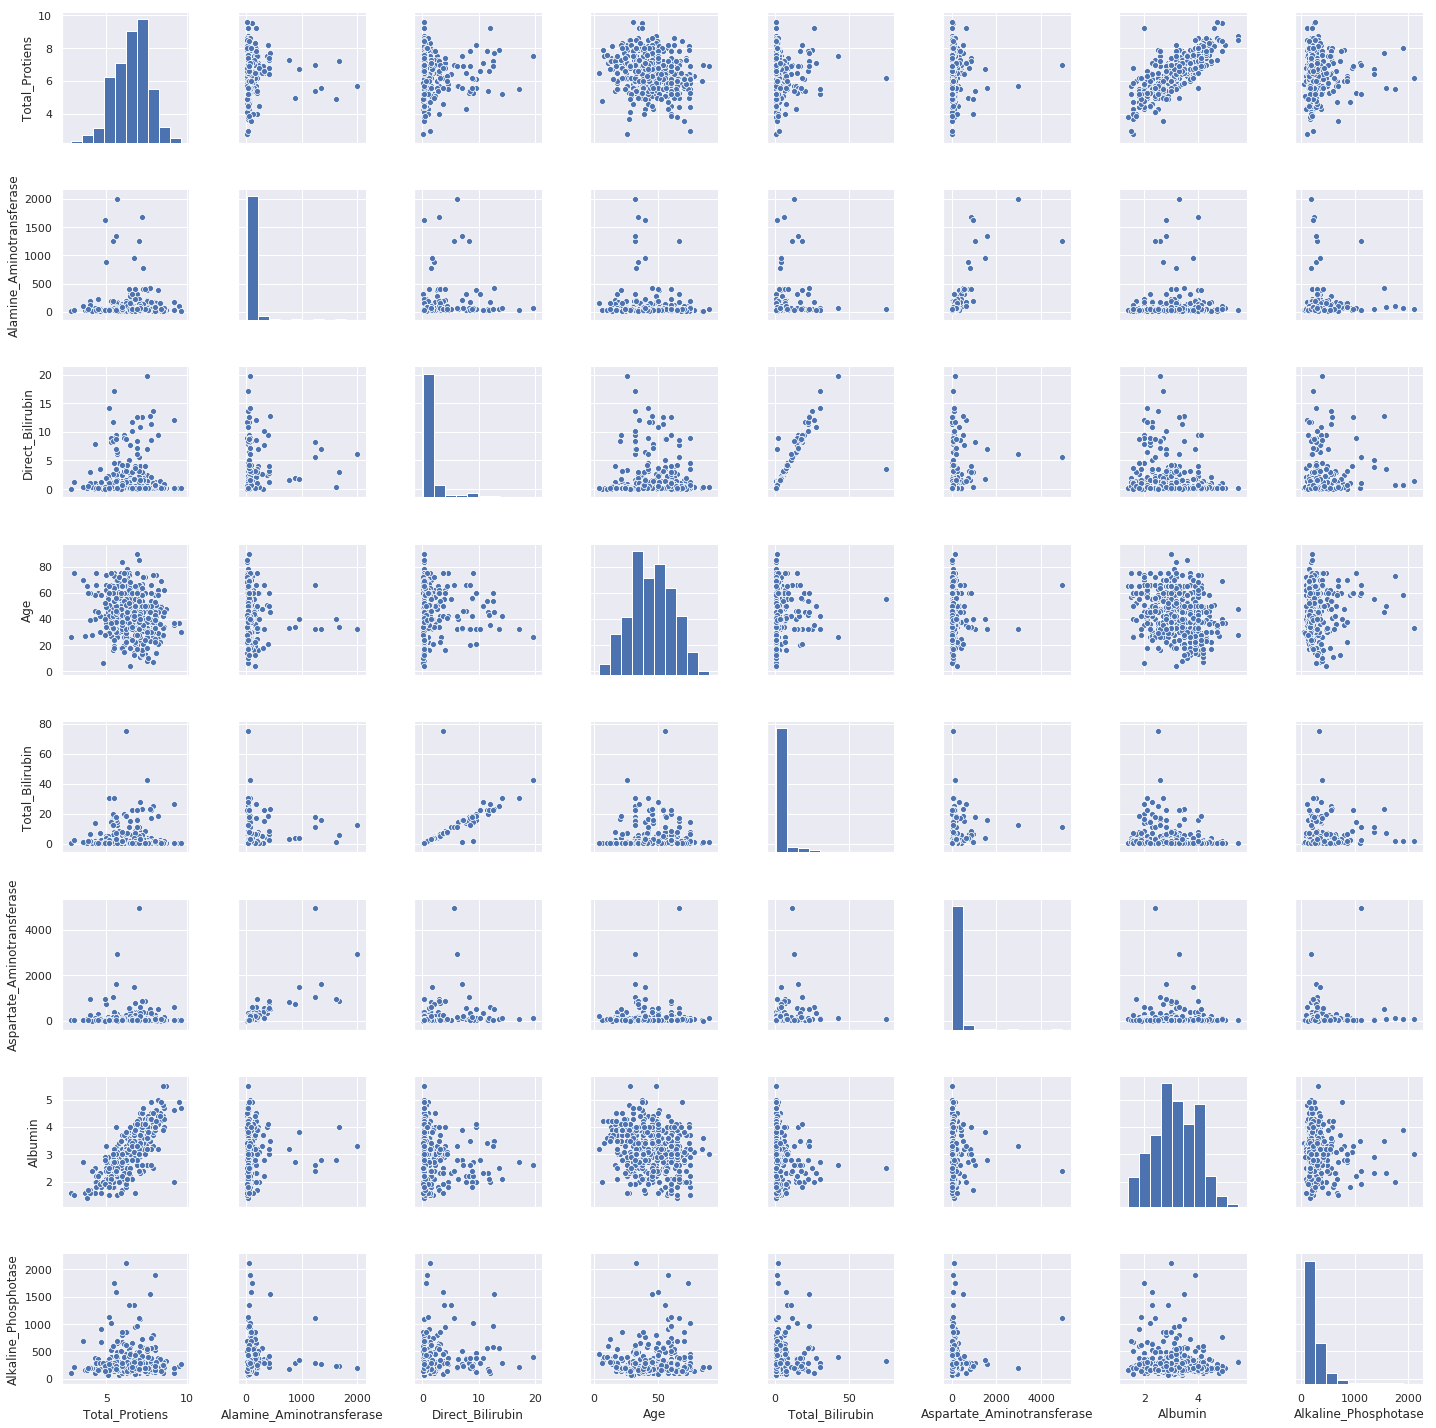

In [30]:
%config InlineBackend.figure_format = 'png'
sns.pairplot(df_train[numerical]);

Los resultados obtenidos son los mismo que al principio de este apartado.

In [0]:
# Volvemos a cambiar la configuración
%config InlineBackend.figure_format = 'svg'